# Bank Churners

## Description
#### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

#### Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

#### Data Description

Data Dictionary:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing - Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

#### Importing the Libraries and Packages that we will need for our analysis

In [1]:
!pip install imblearn

# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")


You should consider upgrading via the 'c:\users\frank_sellhausen\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


#### Importing and checking our dataset

In [2]:
df = pd.read_csv("BankChurners.csv")

In [3]:
# make a copy to preserve integrity of original dataset
data = df.copy()

In [4]:
# check the shape to see what we are working with
data.shape

(10127, 21)

Our dataset has 10,127 rows and 21 columns

In [5]:
# check the first 5 rows
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [6]:
# check the last 5 rows
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [7]:
# check a sample of 10 rows
data.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9081,708500883,Existing Customer,48,M,2,Uneducated,Single,$40K - $60K,Silver,40,2,3,2,17812.000,0,17812.000,0.750,8379,106,0.606,0.000
6433,717217983,Existing Customer,43,F,3,Graduate,Married,Less than $40K,Blue,30,6,2,3,3143.000,2517,626.000,0.959,5409,79,0.881,0.801
10034,714544908,Attrited Customer,56,M,4,Graduate,Divorced,$60K - $80K,Blue,36,6,3,3,6224.000,0,6224.000,0.920,8979,68,0.581,0.000
5277,710666583,Attrited Customer,29,F,1,Uneducated,Single,Less than $40K,Blue,36,3,2,4,2516.000,2312,204.000,0.625,2321,36,0.500,0.919
2007,789987183,Existing Customer,53,M,2,College,Married,$80K - $120K,Blue,45,4,4,4,21953.000,1311,20642.000,0.443,1413,37,0.370,0.060
5109,718056033,Existing Customer,44,F,3,High School,Married,Less than $40K,Blue,34,5,3,2,4135.000,1606,2529.000,0.734,3334,56,0.600,0.388
1800,712902483,Existing Customer,35,M,3,High School,Married,$60K - $80K,Blue,24,3,2,2,2066.000,1699,367.000,0.624,1895,43,0.536,0.822
191,717912483,Existing Customer,43,M,4,Graduate,NaN,$80K - $120K,Blue,27,5,2,0,27259.000,0,27259.000,0.731,1376,35,0.591,0.000
3278,713516433,Existing Customer,36,F,3,College,Single,Less than $40K,Blue,36,6,1,0,5383.000,737,4646.000,0.956,2934,80,0.633,0.137
1087,716284308,Existing Customer,65,M,2,Graduate,Married,abc,Blue,55,3,2,2,6099.000,2175,3924.000,0.582,1319,34,0.545,0.357


In [8]:
# get some basic info on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- we can see that we have some null values in education level and marital status
- data is mostly of integers/floats with some objects

In [9]:
# check for duplicates
data.duplicated().sum()

0

We can see that we have no duplicate records

In [10]:
# let us check the percentage of missing values by column: round to 2 digits
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

In [11]:
# lets clean it up a little by trying it another way and visualizing missing values
# create a boolean mask to id null values
mask = data.isnull() # convert to bools

# total missing values per series
total = mask.sum()

# percent missing values per series
percent = 100*mask.mean()

# create a dataframe that has total missing and percent missing for each of our series
missing_data = pd.concat([total, percent],
                        axis = 1, join = 'outer',
                        keys = ['count_missing', 'perc_missing'])

# order descending to show series with most missing data
missing_data = missing_data.sort_values(by = 'perc_missing', ascending = False)
missing_data

,count_missing,perc_missing
Education_Level,1519,15.000
Marital_Status,749,7.396
CLIENTNUM,0,0.000
Contacts_Count_12_mon,0,0.000
Total_Ct_Chng_Q4_Q1,0,0.000
Total_Trans_Ct,0,0.000
Total_Trans_Amt,0,0.000
Total_Amt_Chng_Q4_Q1,0,0.000
Avg_Open_To_Buy,0,0.000
Total_Revolving_Bal,0,0.000


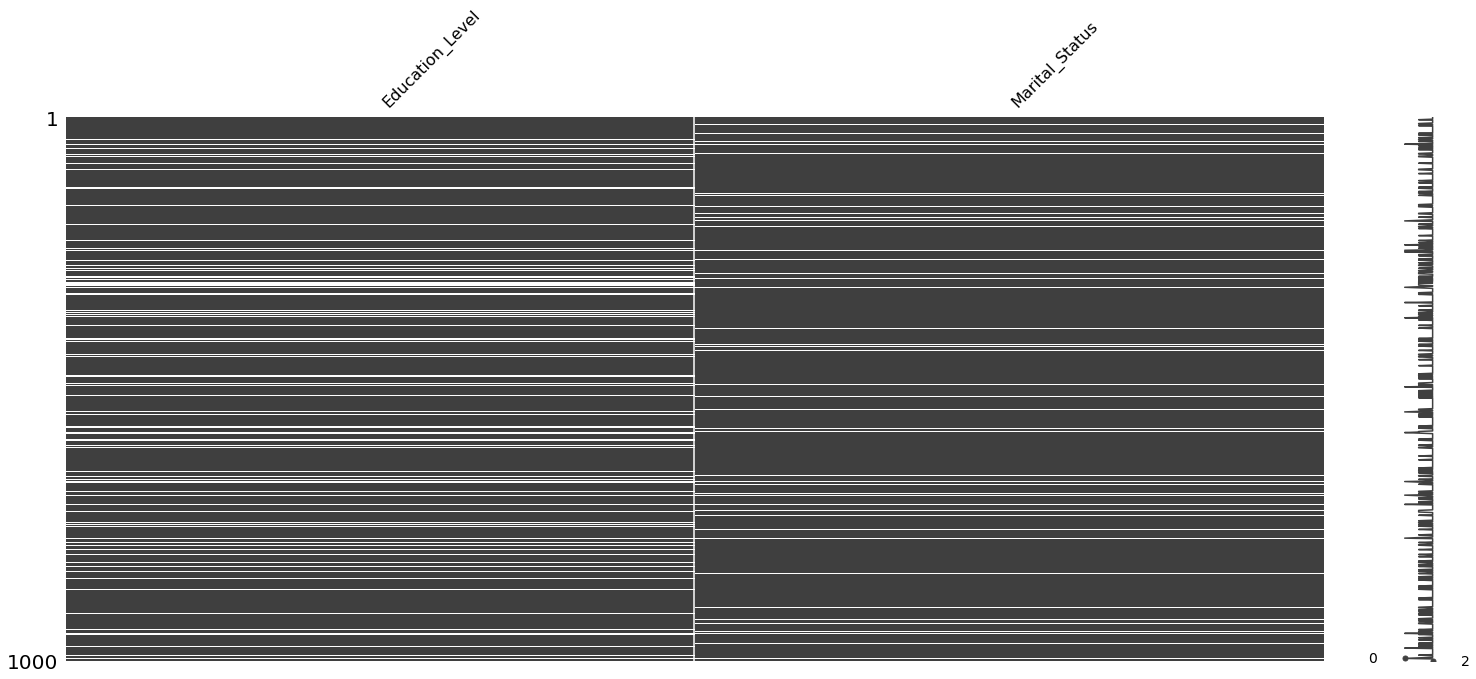

In [12]:
# now we will import missingno to visualize 
import missingno as msno

# visualize missing data - white space implies missing values
nullable_columns = data.columns[mask.any()].tolist()
msno.matrix(data[nullable_columns].sample(1000))
plt.show()

This visualization tracks with what we learned by creating the list above - there are a lot of values missing for education level and quite a few for marital status

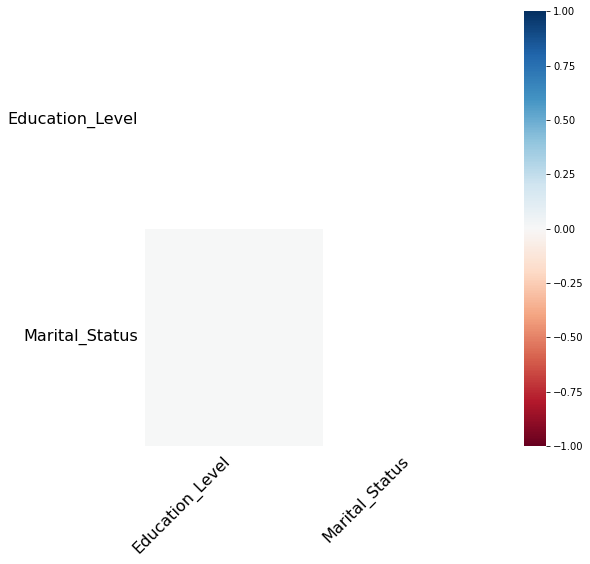

In [13]:
# check corr of missing values
msno.heatmap(data, figsize = (8,8))
plt.show()

In [14]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [15]:
# lets check the values of object type data
num_to_display = 10
for colname in data.dtypes[data.dtypes == 'object'].index:
    val_counts = data[colname].value_counts(dropna = False)
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying the first {num_to_display} of {len(val_counts)} values.')
    print('\n\n')

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64



F    5358
M    4769
Name: Gender, dtype: int64



Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64



Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64



Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64



Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64





We can see that we have some anomalies that we will have to take care of in income category ('abc') and marital status (NaN)
- we will keep this in mind when processing the data

In [16]:
# transform our attrition flat to represent the positive class with a 1

# using simple imputer to handle missing values
from sklearn.impute import SimpleImputer

data[df.Income_Category == 'abc']['Income_Category'] = np.nan
data['Income_Category'] = data['Income_Category'].replace({'abc': np.nan})

In [17]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

imputer = imputer.fit(data[['Education_Level','Marital_Status', 'Income_Category']])

data[['Education_Level','Marital_Status', 'Income_Category']] = imputer.transform(data[['Education_Level','Marital_Status', 'Income_Category']])

In [18]:
# lets check the values of object type data after the transformations
num_to_display = 10
for colname in data.dtypes[data.dtypes == 'object'].index:
    val_counts = data[colname].value_counts(dropna = False)
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying the first {num_to_display} of {len(val_counts)} values.')
    print('\n\n')

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64



F    5358
M    4769
Name: Gender, dtype: int64



Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64



Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64



Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64



Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64





That looks a lot better - we took care of the missing and errant values

In [19]:
# verify no missing values
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [20]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [21]:
data.Customer_Age.describe()

count   10127.000
mean       46.326
std         8.017
min        26.000
25%        41.000
50%        46.000
75%        52.000
max        73.000
Name: Customer_Age, dtype: float64

In [22]:
# create a new variable: Age_Group
data['Age_Group'] = pd.cut(data['Customer_Age'], 
                        bins = [0, 42, 47 , 53, 74, 100], 
                        labels = ['Up to 41', '42-46', '47-52', '53-72', '73 or older'])

In [23]:
data.Age_Group.value_counts()

Up to 41       3202
47-52          2580
42-46          2428
53-72          1917
73 or older       0
Name: Age_Group, dtype: int64

In [24]:
data.Months_on_book.describe()

count   10127.000
mean       35.928
std         7.986
min        13.000
25%        31.000
50%        36.000
75%        40.000
max        56.000
Name: Months_on_book, dtype: float64

In [25]:
# create a new variable: Months_Group
data['Months_Group'] = pd.cut(data['Months_on_book'], 
                        bins = [0, 32, 37, 41, 57, 100], 
                        labels = ['Up to 31', '32-36', '37-40', '41-55', '56 or more'])

In [26]:
data.Months_Group.value_counts()

32-36         3796
Up to 31      2827
41-55         2186
37-40         1318
56 or more       0
Name: Months_Group, dtype: int64

In [27]:
data.Total_Trans_Amt.describe()

count   10127.000
mean     4404.086
std      3397.129
min       510.000
25%      2155.500
50%      3899.000
75%      4741.000
max     18484.000
Name: Total_Trans_Amt, dtype: float64

In [28]:
# create a new variable: Months_Group
data['Trans_Amt_Group'] = pd.cut(data['Total_Trans_Amt'], 
                        bins = [0, 2155, 4742, 18484], 
                        labels = ['low', 'middle', 'high'])

In [29]:
data.Trans_Amt_Group.value_counts()

middle    5069
low       2532
high      2526
Name: Trans_Amt_Group, dtype: int64

In [30]:
data.Total_Trans_Ct.describe()

count   10127.000
mean       64.859
std        23.473
min        10.000
25%        45.000
50%        67.000
75%        81.000
max       139.000
Name: Total_Trans_Ct, dtype: float64

In [31]:
# create a new variable: Months_Group
data['Trans_Ct_Group'] = pd.cut(data['Total_Trans_Ct'], 
                        bins = [0, 45, 82, 139], 
                        labels = ['low', 'middle', 'high'])

In [32]:
data.Trans_Ct_Group.value_counts()

middle    5376
low       2611
high      2140
Name: Trans_Ct_Group, dtype: int64

In [33]:
attrited = {"Existing Customer" : 0, "Attrited Customer": 1}
data["Attrition_Flag"] = data["Attrition_Flag"].map(attrited)

In [34]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group,Months_Group,Trans_Amt_Group,Trans_Ct_Group
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061,42-46,37-40,low,low
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105,47-52,41-55,low,low
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000,47-52,32-36,low,low
3,769911858,0,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760,Up to 41,32-36,low,low
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000,Up to 41,Up to 31,low,low


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  int64   
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  object  
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  object  
 6   Marital_Status            10127 non-null  object  
 7   Income_Category           10127 non-null  object  
 8   Card_Category             10127 non-null  object  
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [36]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

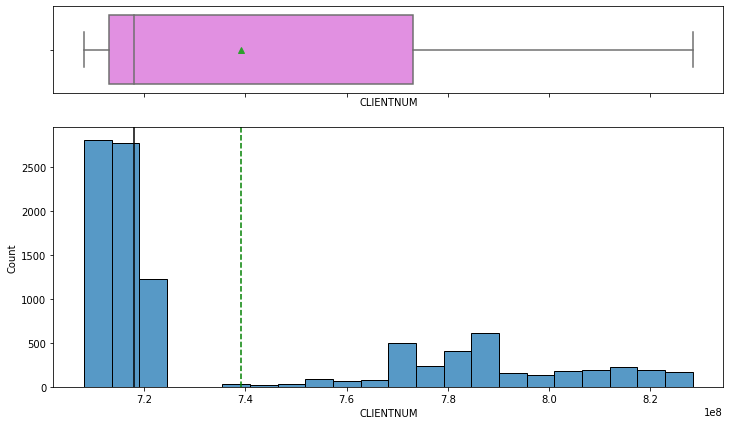

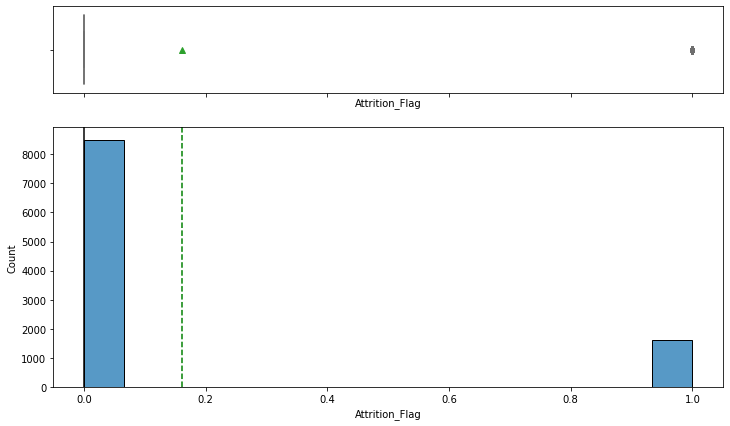

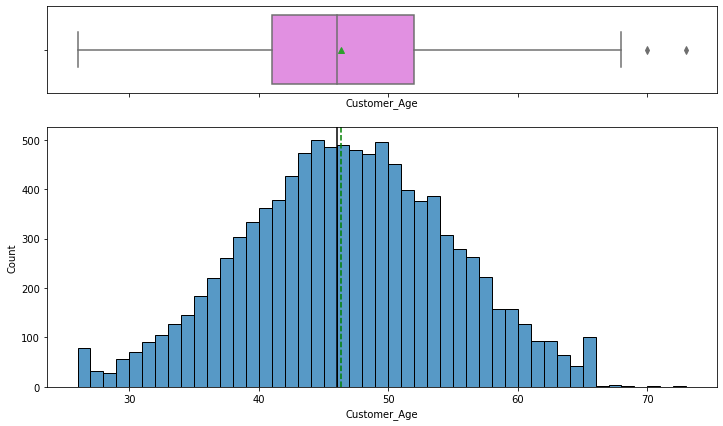

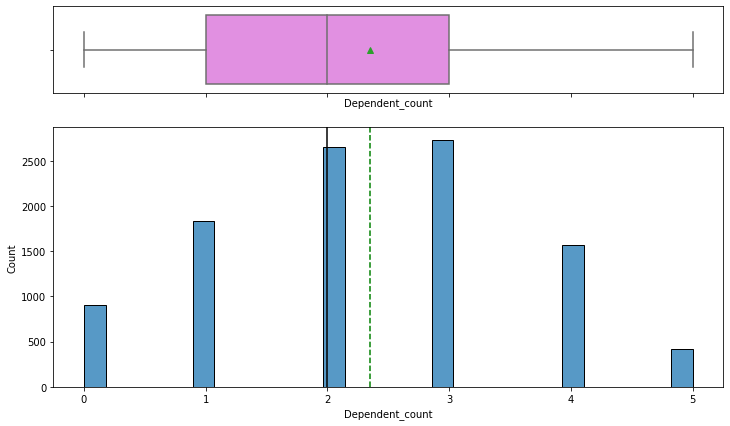

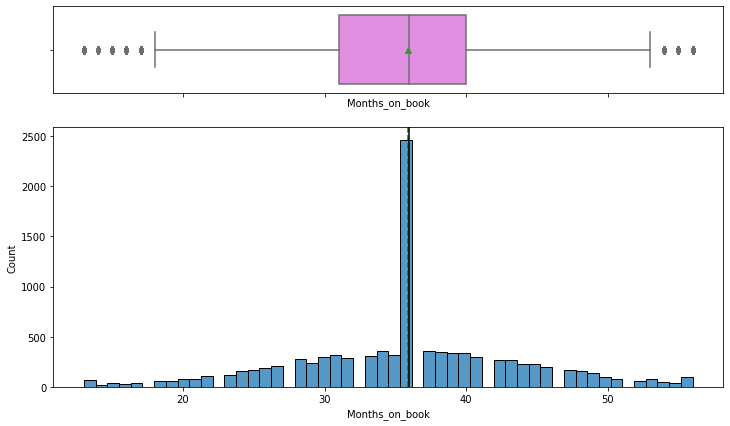

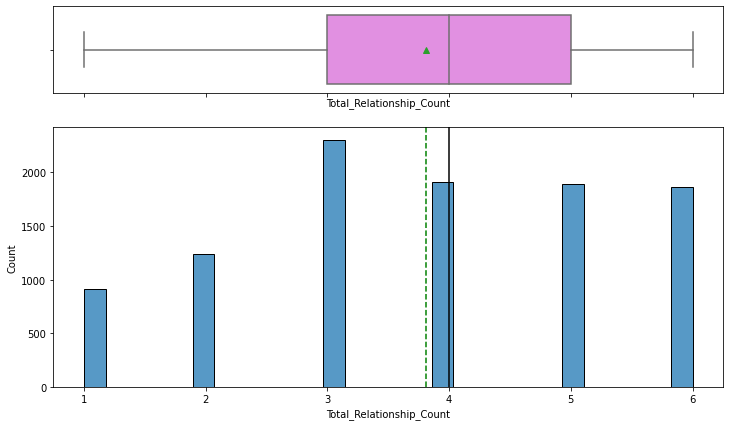

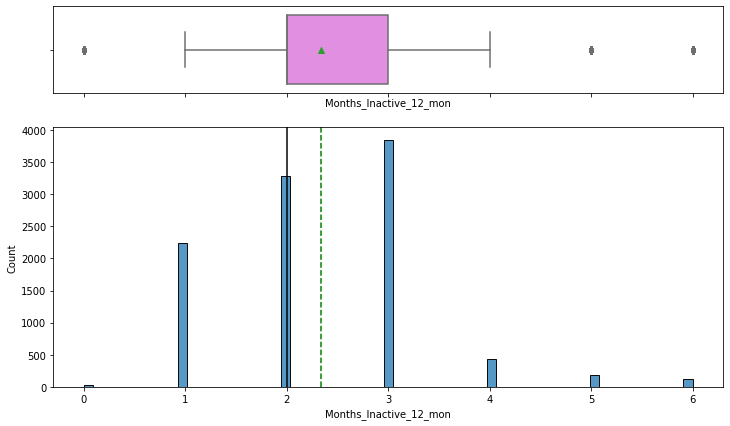

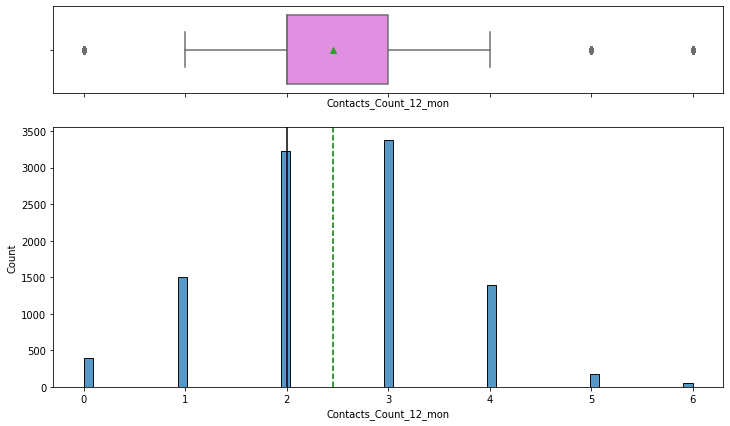

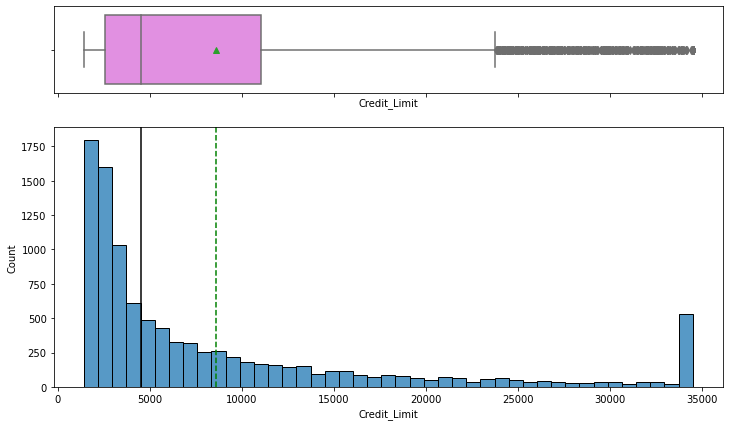

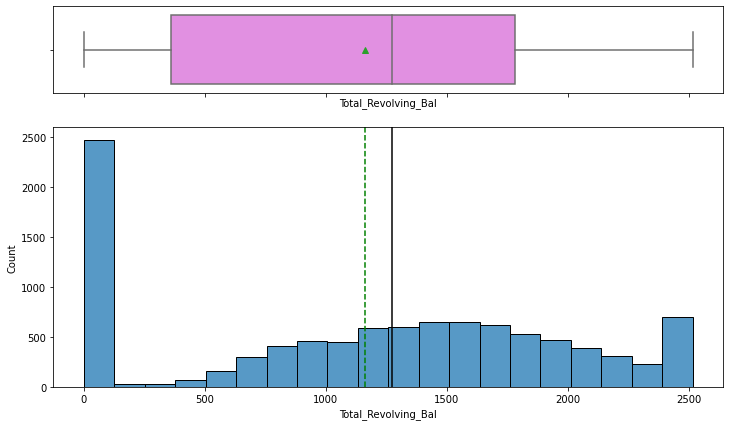

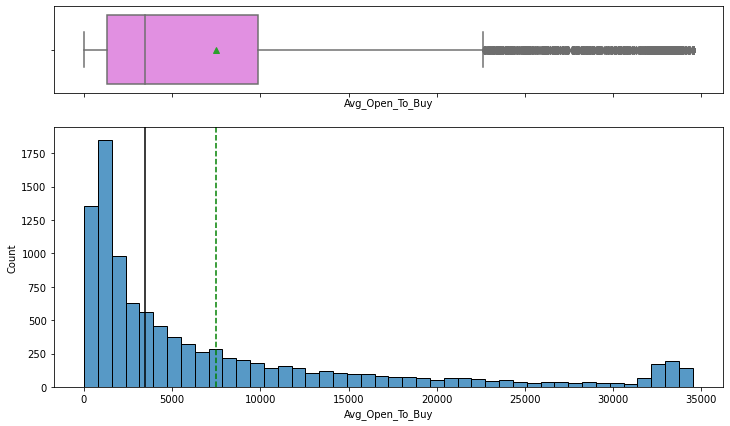

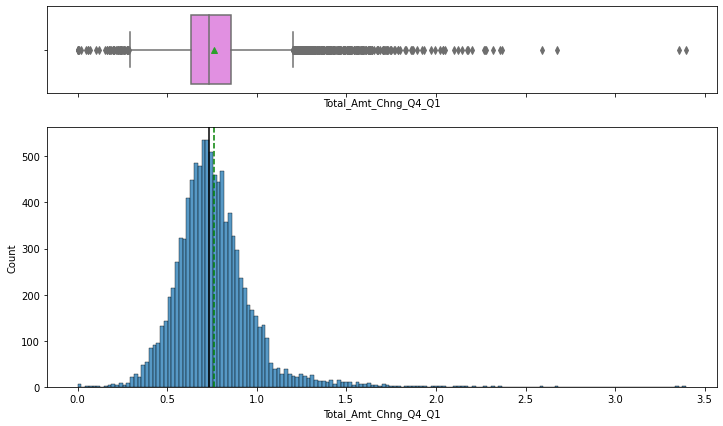

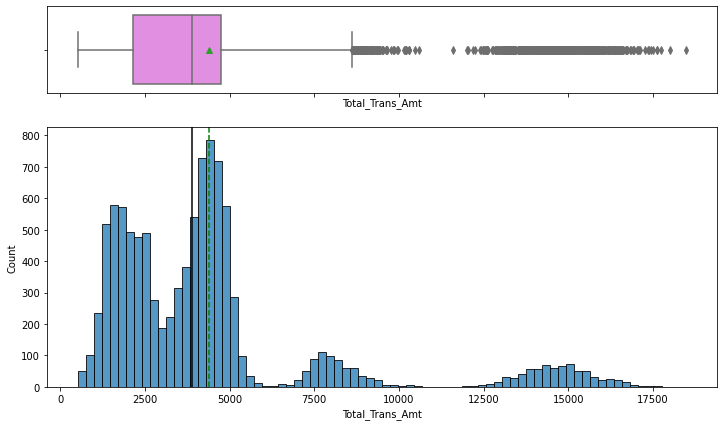

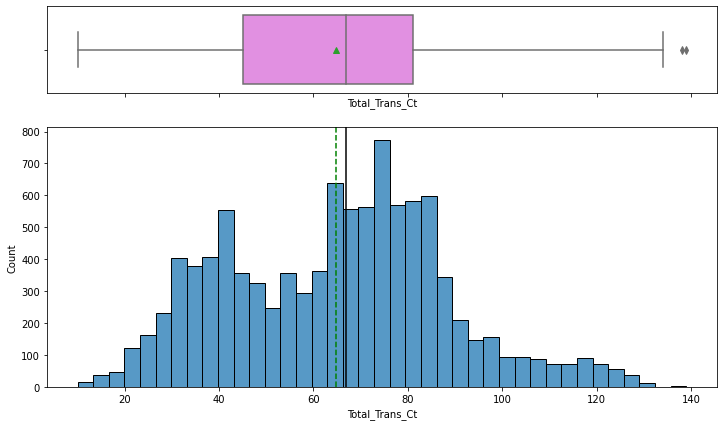

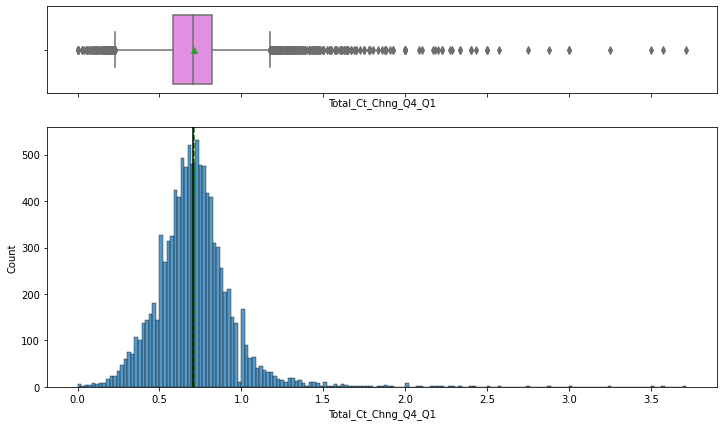

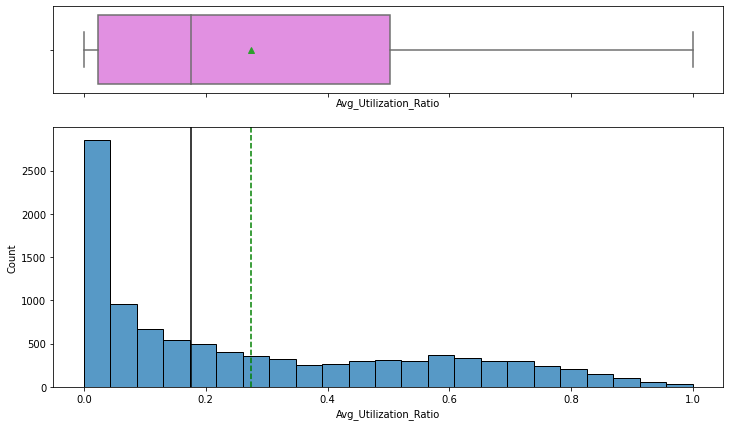

In [37]:
# getting a list of columns that are number type and passing to for loop for hist_boxplots
numeric_cols = data.select_dtypes(include=np.number)
numeric_cols.columns

for col in numeric_cols.columns:
    histogram_boxplot(data, col)

Wrote a for loop to expedite EDA - some quick observations: 
- we can ignore clientnum as we will be dropping this (no predictive value)
- customer age is fairly normally distributed with some outliers
- dep count is fairly normally distributed with no outliers
- months on book is concentrated around the mean/median and has some outliers
- months inactive is fairly normal with some outliers as is contacts counts - both have some outliers
- credit limit is skewed to the right and has many outliers on the top end, as is average open to buy
- total revolving balance has some concentrations around the upper and lower limits but no outliers
- total amount change from q4 to q1 is tightly concentrated but has many outliers, most notably over the upper limit
- total trans amt has several distinct peaks with many outliers over the upper limit
- total tran ct looks to be bimodal with some outliers
- avg utilization is right skewed


In [38]:
data.drop('CLIENTNUM', axis=1, inplace=True)

In [39]:
to_cat = ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category',]

data[to_cat] = data[to_cat].astype('category')
print(data.dtypes)

Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
Age_Group                   category
Months_Group                category
Trans_Amt_Group             category
Trans_Ct_Group              category
dtype: object


In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.000,0.760,0.219,0.000,0.631,0.736,0.859,3.397


In [41]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

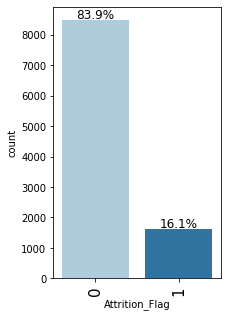

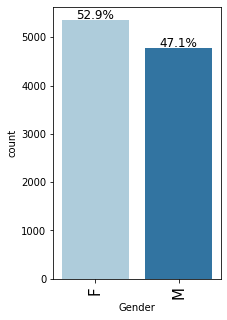

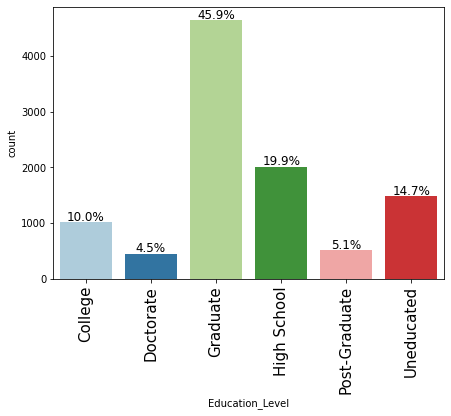

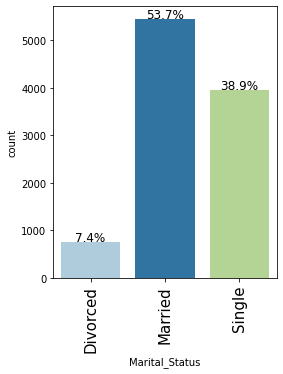

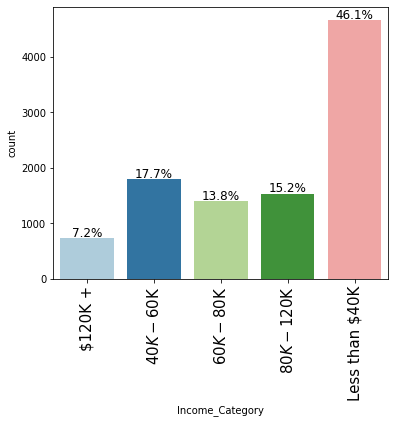

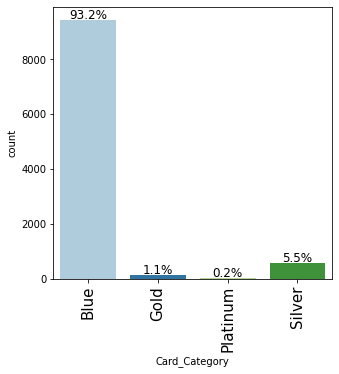

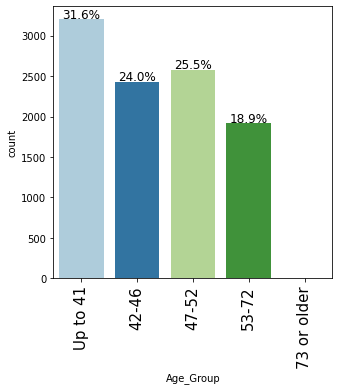

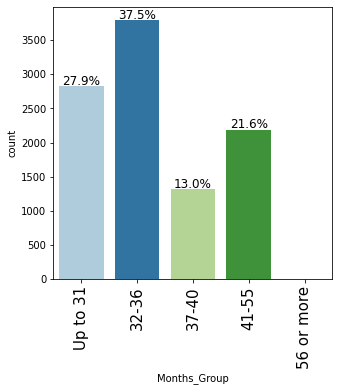

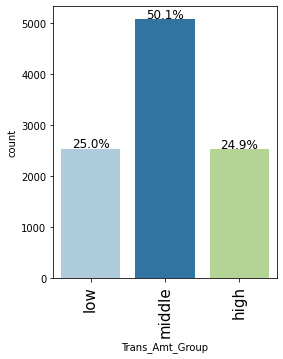

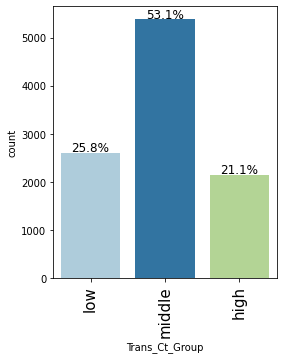

In [42]:
bar_plots = data.select_dtypes(include='category')

for col in bar_plots:
     labeled_barplot(data, col, perc = True)
     plt.show()

Some quick observations on our categorical data: 
- our target variable is imblanced : 84% are existing customers and 16% are attrited
- females represent 53% and males 47%
- almost half of our customers have graduate degrees
- over half are married
- 46% of our customers make less than 40k
- most of our customers are in the blue category

Examining the data through another lens by only looking at attrited customers

In [43]:
data.Attrition_Flag.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [45]:
# new df that only includes attrited
data_attrited = data[data.Attrition_Flag == 1]

In [46]:
data_attrited.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group,Months_Group,Trans_Amt_Group,Trans_Ct_Group
21,1,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.300,0,1438.300,1.047,692,16,0.600,0.000,53-72,41-55,low,low
39,1,66,F,0,Doctorate,Married,Less than $40K,Blue,56,5,4,3,7882.000,605,7277.000,1.052,704,16,0.143,0.077,53-72,41-55,low,low
51,1,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,3,1,1438.300,808,630.300,0.997,705,19,0.900,0.562,53-72,37-40,low,low
54,1,56,M,2,Graduate,Married,$120K +,Blue,36,1,3,3,15769.000,0,15769.000,1.041,602,15,0.364,0.000,53-72,32-36,low,low
61,1,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,4,34516.000,0,34516.000,0.763,691,15,0.500,0.000,47-52,32-36,low,low


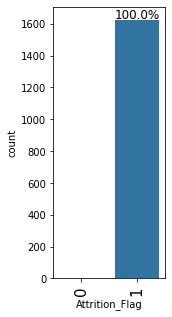

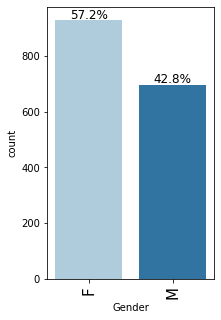

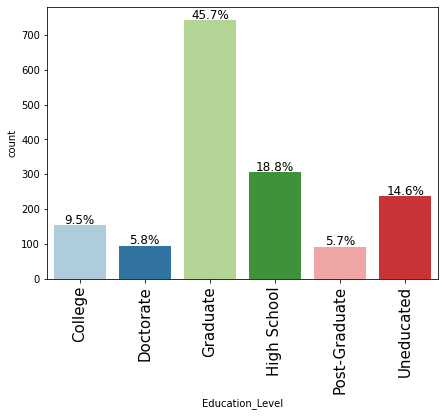

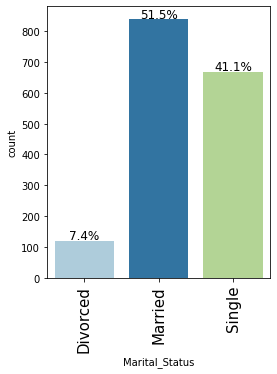

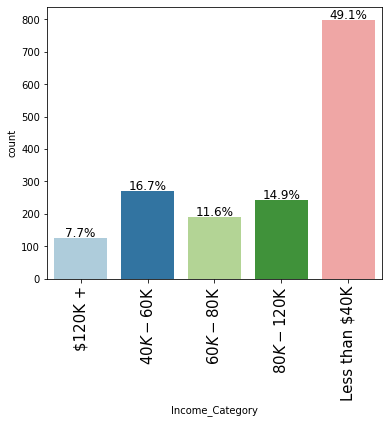

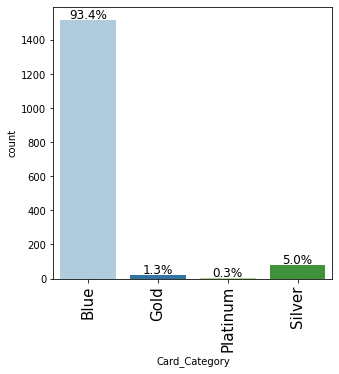

In [47]:
# lets look at barplots that only include info from conversions
bar_plots = to_cat

for col in bar_plots:
    labeled_barplot(data_attrited, col, perc = True)
    plt.show()

- 57% of attrited customers are female
- 46% hold a graduate degree
- 52% are married
- almost half make less than 40k 
- the overwhelming majority have blue category cards

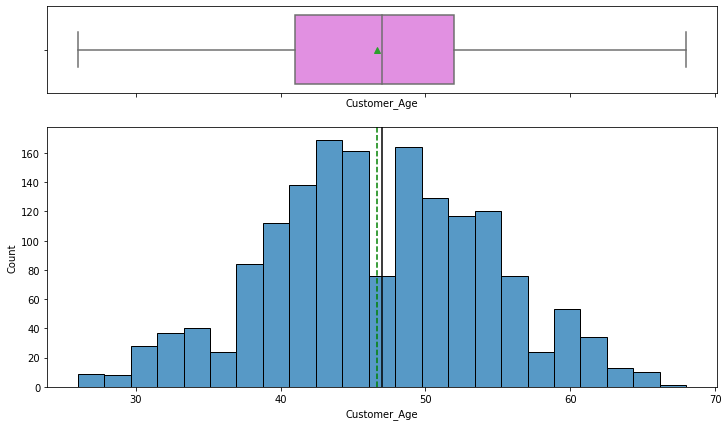

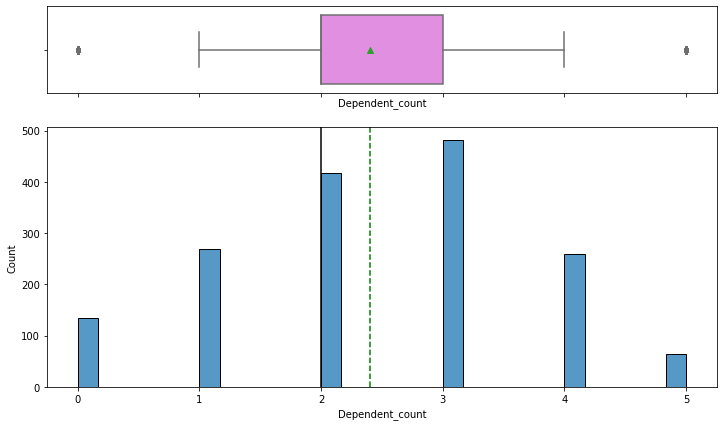

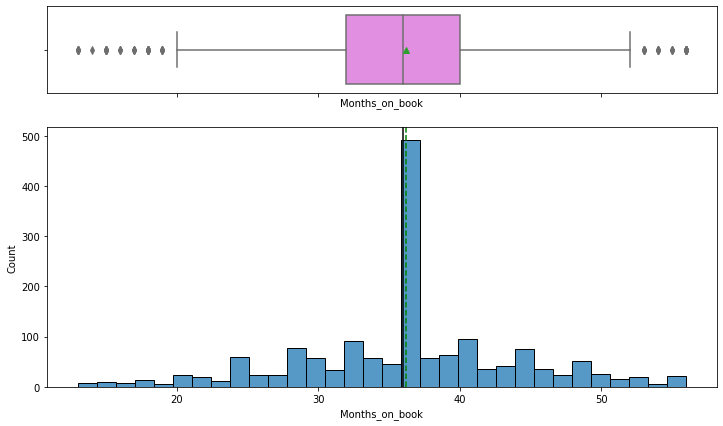

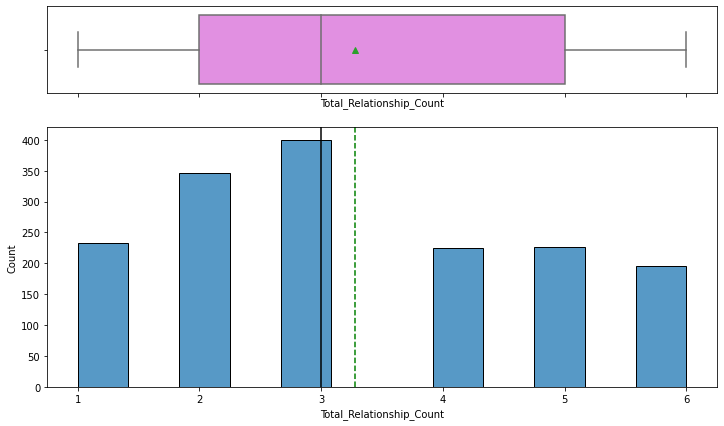

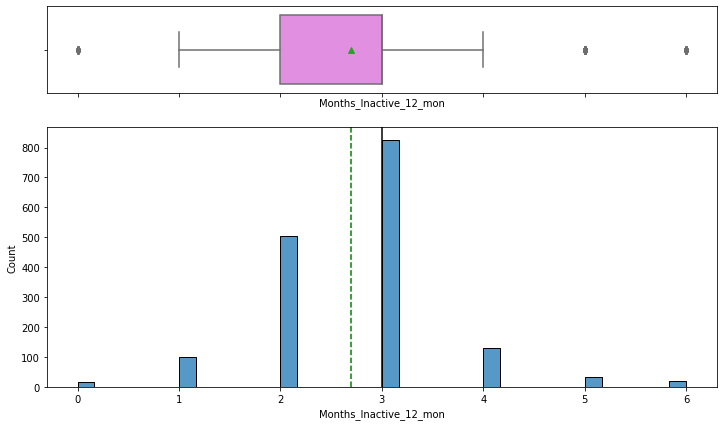

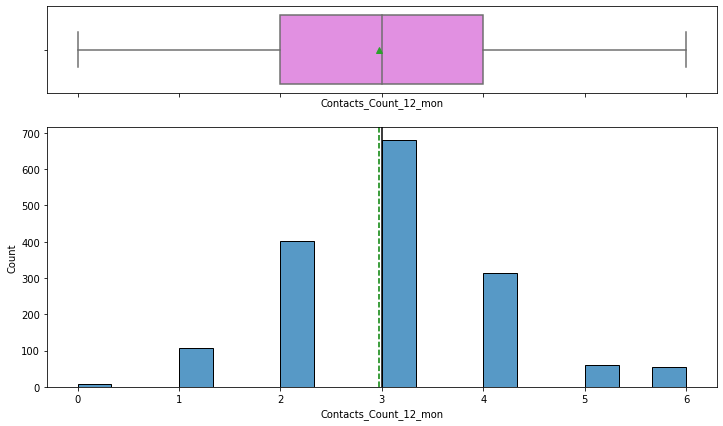

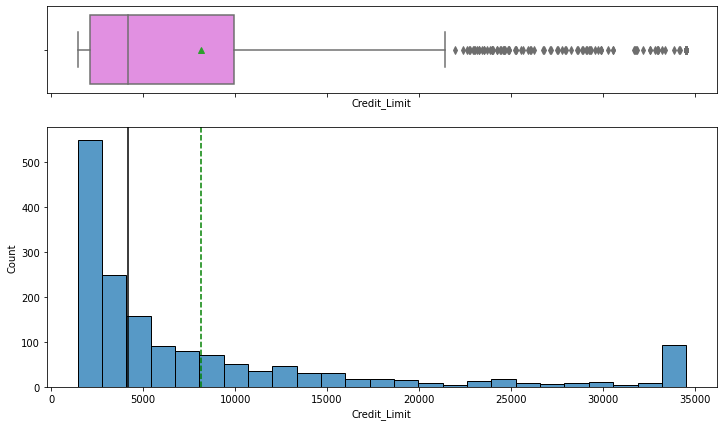

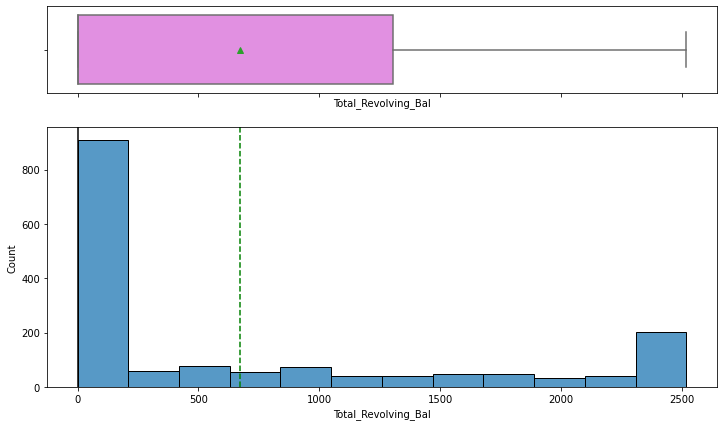

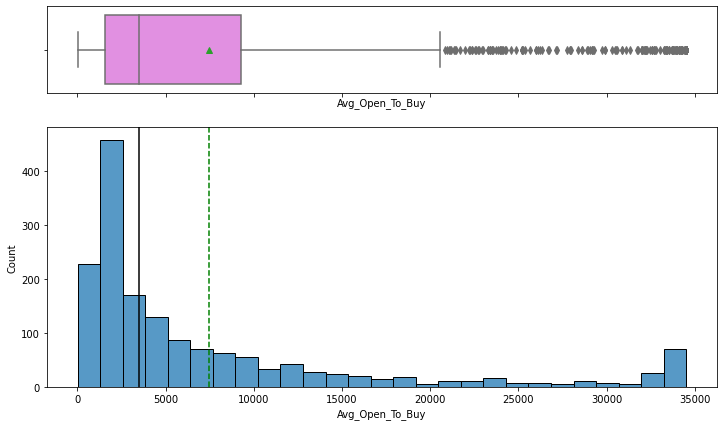

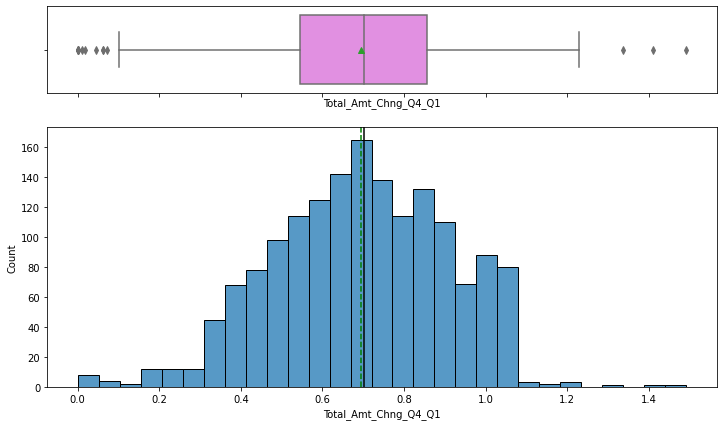

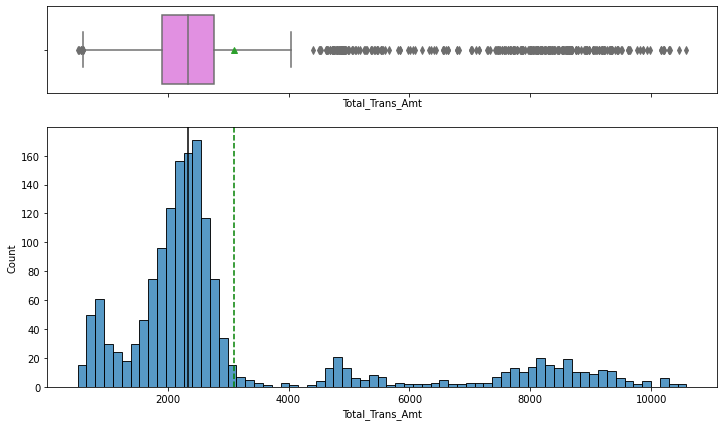

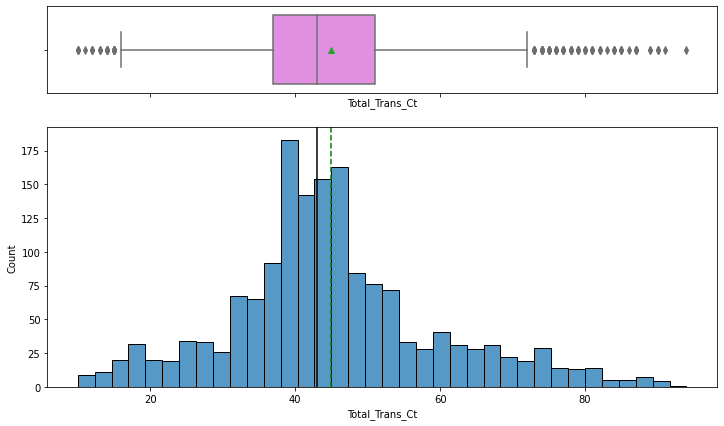

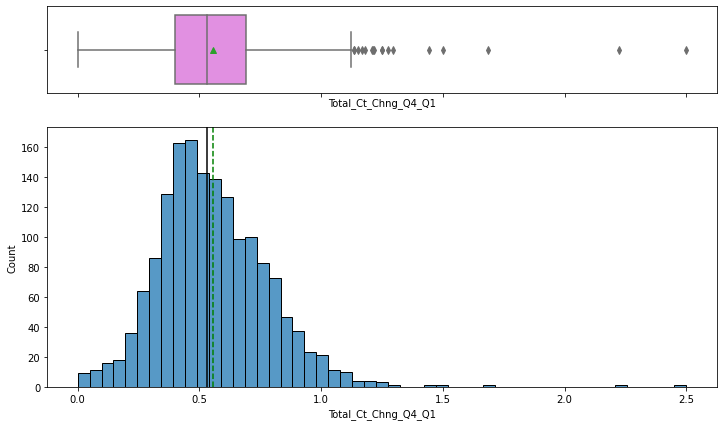

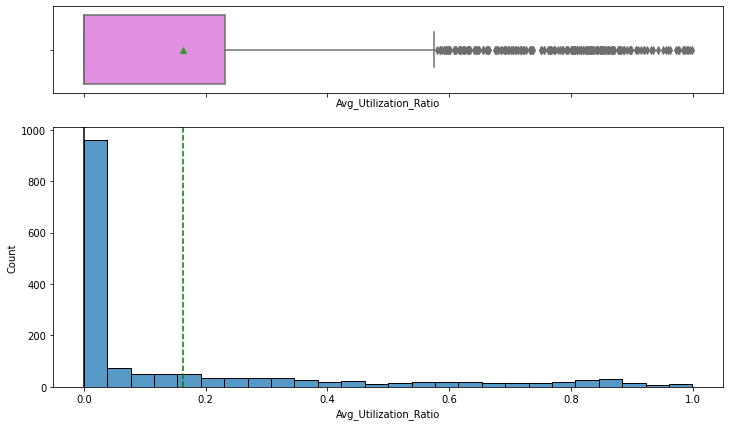

In [48]:
# getting a list of columns that are number type and passing to for loop for hist_boxplots
numeric_cols = data_attrited.select_dtypes(include=np.number)
numeric_cols.columns

for col in numeric_cols.columns:
    histogram_boxplot(data_attrited, col)

In [49]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


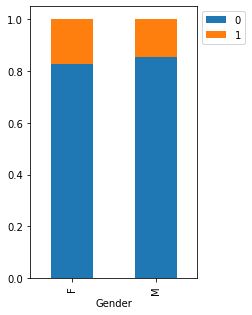

In [50]:
stacked_barplot(data, "Gender", "Attrition_Flag")

Females attrite proportionally higher than males

Attrition_Flag      0     1    All
Education_Level                   
All              8500  1627  10127
Graduate         3904   743   4647
High School      1707   306   2013
Uneducated       1250   237   1487
College           859   154   1013
Doctorate         356    95    451
Post-Graduate     424    92    516
------------------------------------------------------------------------------------------------------------------------


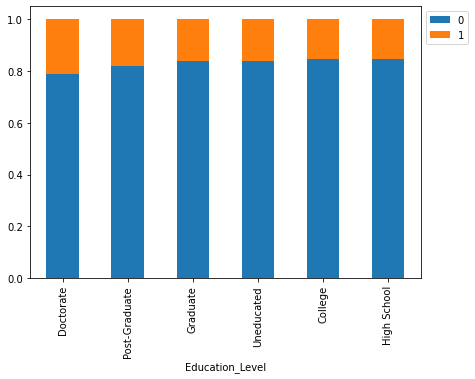

In [51]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

- higher education appears to lead to more attrition

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   3874   799   4673
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


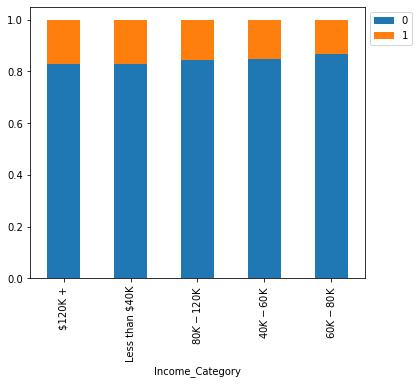

In [52]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

- higher and lower income appears to lead to more attrition

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


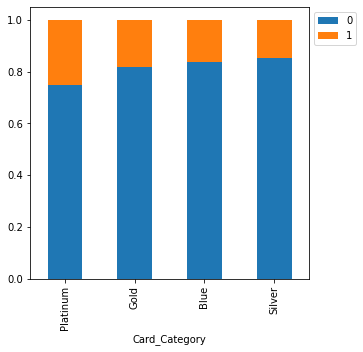

In [53]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

- more attrition has occured in the upper level (platinum and gold) segments

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


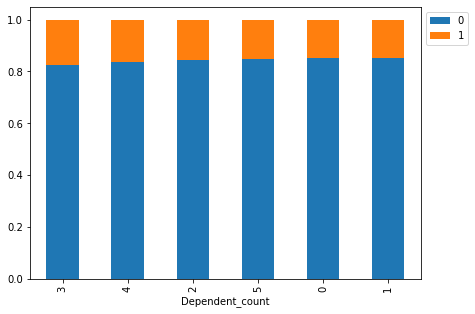

In [54]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

- attrition is relatively stable across dependent counts, with only a slightly higher incidence in those with more deps

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


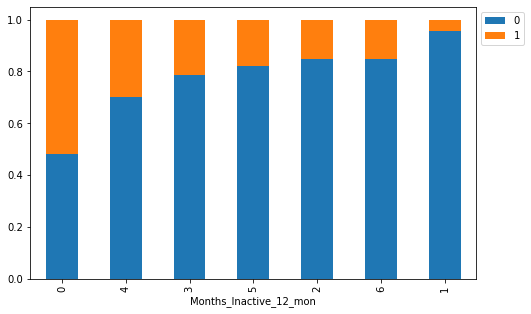

In [55]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

- activity appears to impact attrition
- more recent activity is generally associated with less attrition

In [56]:
data.dtypes

Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
Age_Group                   category
Months_Group                category
Trans_Amt_Group             category
Trans_Ct_Group              category
dtype: object

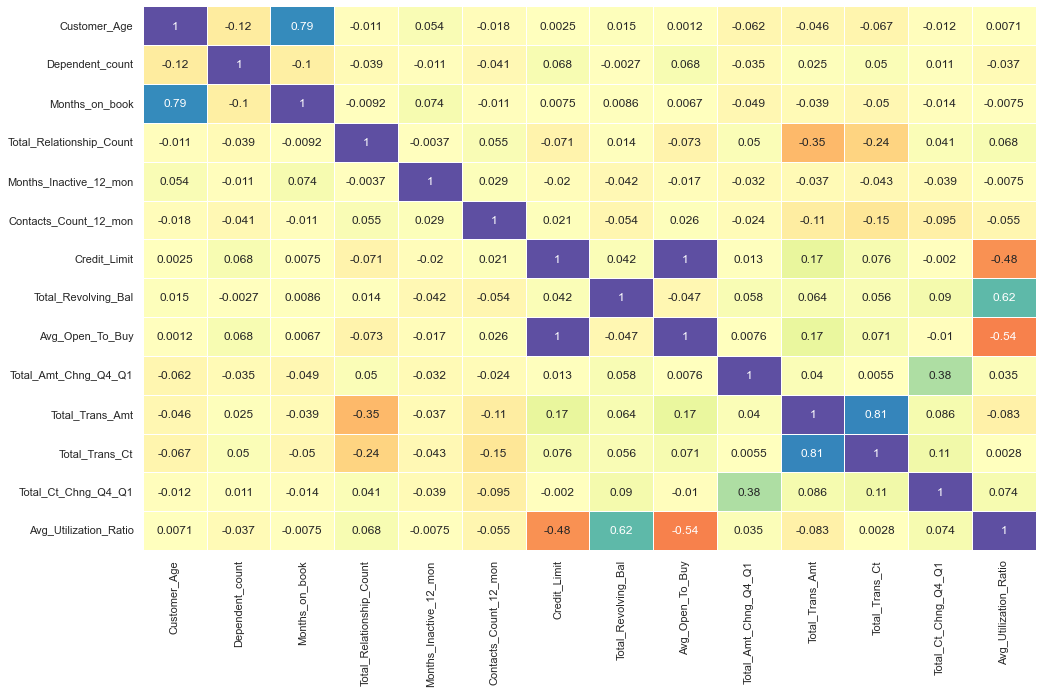

In [57]:
# check correlation between our variables
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

In [58]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Age_Group', 'Months_Group', 'Trans_Amt_Group', 'Trans_Ct_Group'],
      dtype='object')

In [59]:
#sns.pairplot(data = data, hue='Attrition_Flag', corner=True)

### Prepare Data for Modeling

In [60]:
# functions to treat outliers by flooring and capping


def treat_outliers(data, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = data[col].quantile(0.25)  # 25th quantile
    Q3 = data[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker)

    return data


def treat_outliers_all(data, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        data = treat_outliers(data, c)

    return data

In [61]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data_ol = treat_outliers_all(data, numerical_col)

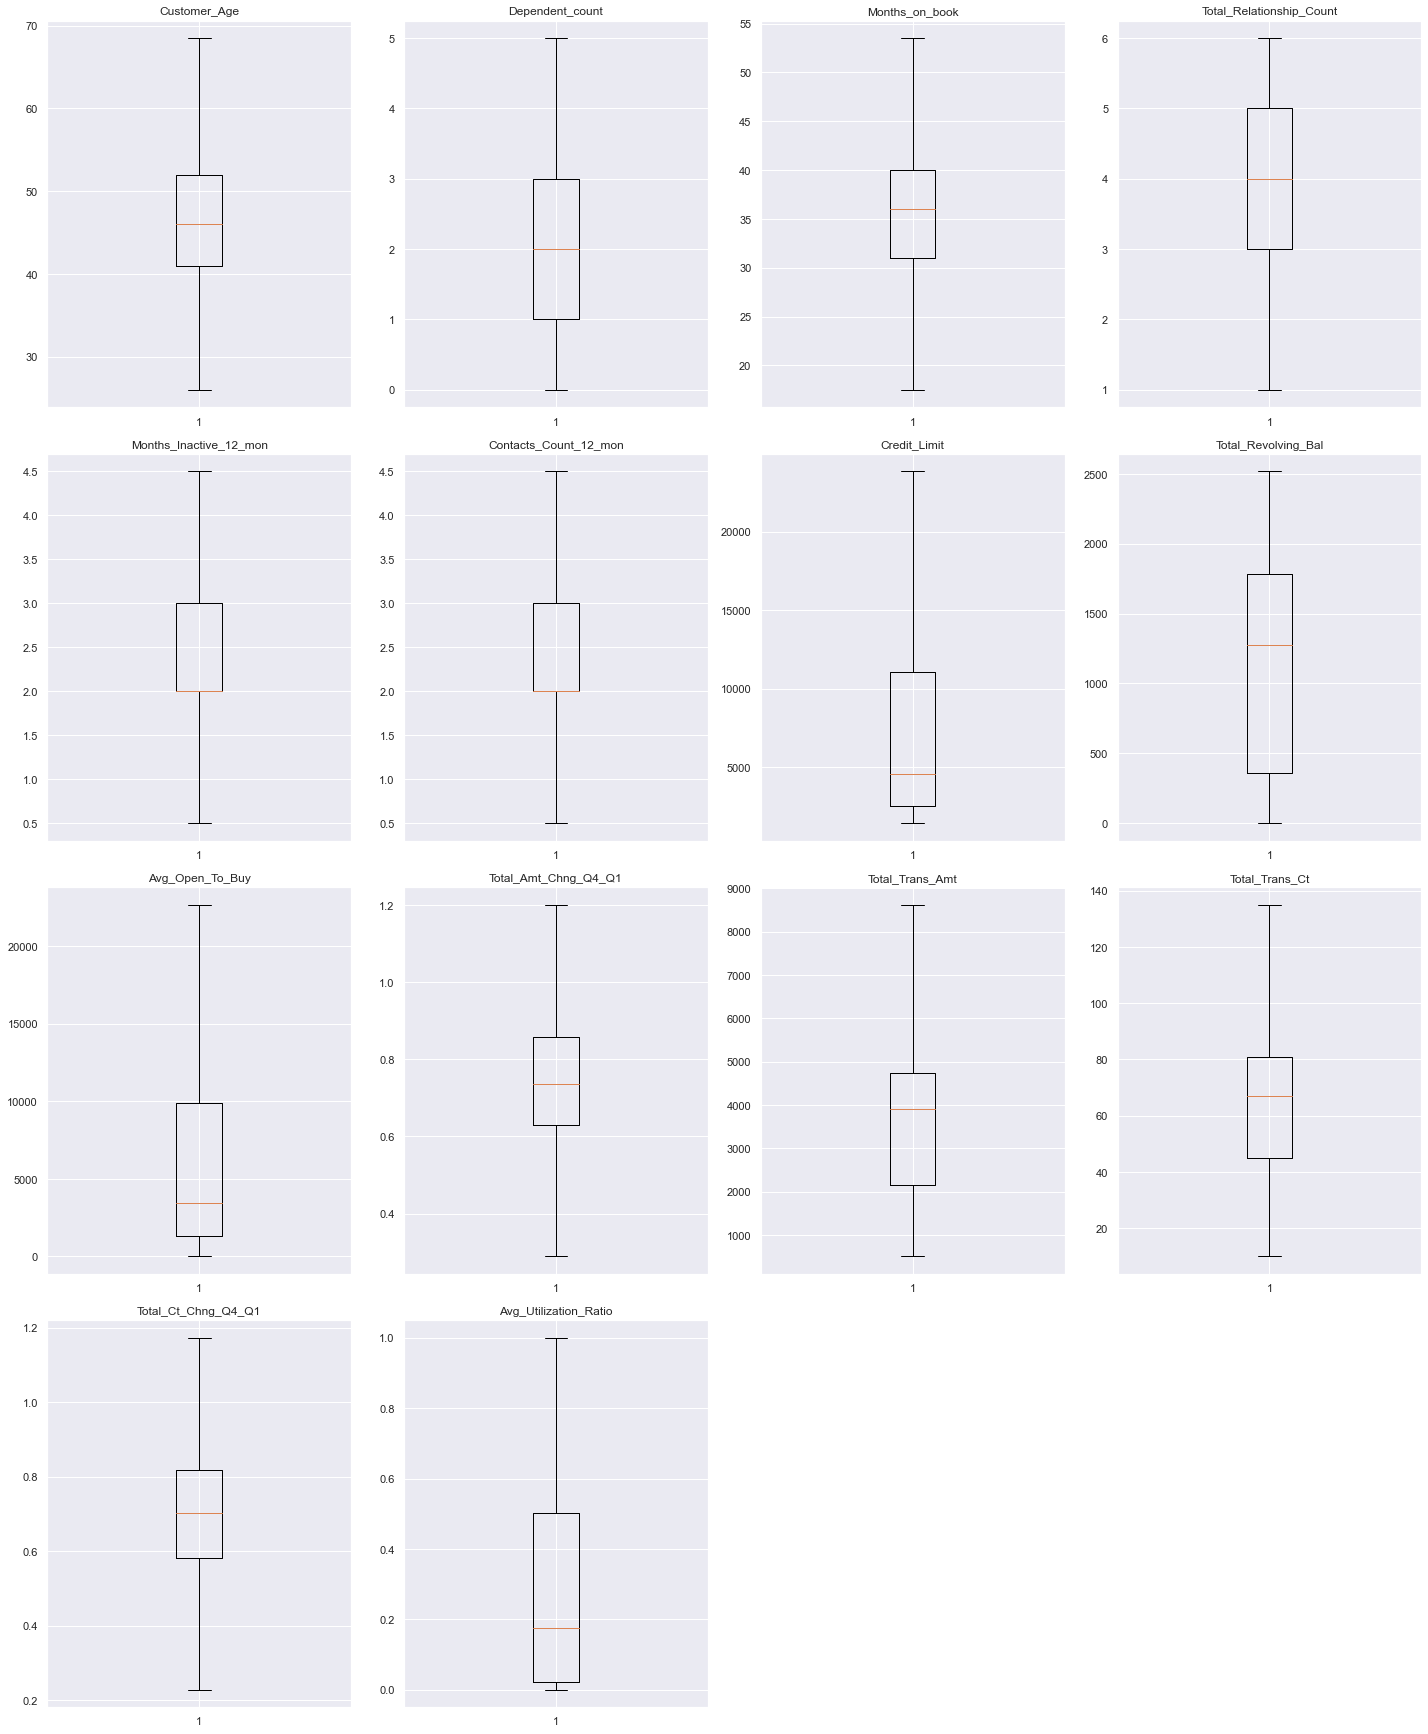

In [62]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data_ol[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show() 

We can see that the outliers are gone now

In [63]:
data_ol.shape

(10127, 24)

In [64]:
data_ol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  float64 
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  float64 
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  float64 
 11  Contacts_Count_12_mon     10127 non-null  float64 
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [65]:
# define X and y variables
X = data_ol.drop(["Attrition_Flag"], axis=1)
y = data_ol["Attrition_Flag"]

In [66]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 23) (2026, 23) (2026, 23)


In [67]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


In [68]:
# encode variables 
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 41) (2026, 41) (2026, 41)


In [69]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Age_Group_42-46,Age_Group_47-52,Age_Group_53-72,Age_Group_73 or older,Months_Group_32-36,Months_Group_37-40,Months_Group_41-55,Months_Group_56 or more,Trans_Amt_Group_middle,Trans_Amt_Group_high,Trans_Ct_Group_middle,Trans_Ct_Group_high
800,40.000,2,21.000,6,4.000,3.000,20056.000,1602,18454.000,0.466,1687.000,46.000,0.533,0.080,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
498,44.000,1,34.000,6,2.000,0.500,2885.000,1895,990.000,0.387,1366.000,31.000,0.632,0.657,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4356,48.000,4,36.000,5,1.000,2.000,6798.000,2517,4281.000,0.873,4327.000,79.000,0.881,0.370,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
407,41.000,2,36.000,6,2.000,0.500,23836.250,0,22660.750,0.610,1209.000,39.000,0.300,0.000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
8728,46.000,4,36.000,2,2.000,3.000,15034.000,1356,13678.000,0.754,7737.000,84.000,0.750,0.090,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1


### Model Building and Considerations

#### Model evaluation criterion:
Model can make wrong predictions as:
Predicting a customer will churn and customer doesn't churn - Loss of resources trying to keep the customer
Predicting a customer will not churn and the customer does churn - Loss of opportunity from keeping a customer

#### Which case is more important?
Predicting that a customer will not churn and the customer does churn. This would lead to income over time which exceeds the marginal marketing resources that we will expend to maintain relationships. 

#### How to reduce this loss i.e need to reduce False Negatives?
Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives (predict customer won't churn when they actually will).

In [70]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 78.5839874411303
Random forest: 77.45473574045002
GBM: 81.55468341182628
Adaboost: 81.34746206174779
Xgboost: 85.85766614338043
dtree: 78.07535321821038

Training Performance:

Bagging: 98.5655737704918
Random forest: 100.0
GBM: 88.2172131147541
Adaboost: 83.70901639344262
Xgboost: 100.0
dtree: 100.0


Observations: 
- generalizes well: Adaboost, GBM
- all others seem to be overfitting quite a bit

Now we will try oversampling the data and compare our results

In [71]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 41)
After Oversampling, the shape of train_y: (10198,) 



In [72]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 96.4502684292559
Random forest: 98.03881159922263
GBM: 97.19555889087725
Adaboost: 96.5681079104851
Xgboost: 98.27418268583192
dtree: 94.84213665839249

Training Performance:

Bagging: 99.68621298293783
Random forest: 100.0
GBM: 98.19572465189252
Adaboost: 96.50911943518336
Xgboost: 100.0
dtree: 100.0


We can observe that oversampling the data to deal with the imbalance had a significant impact on our model performance: 
- All of our models generalize much better
- XGB, random forest, and GBM have great recall scores

Now we will run our models agains the validation set with undersampled data

In [73]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [74]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 41)
After Under Sampling, the shape of train_y: (1952,) 



In [75]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 91.08634222919937
Random forest: 93.85557299843015
GBM: 93.75091575091575
Adaboost: 93.03296703296704
Xgboost: 95.18576661433805
dtree: 88.52485609628467

Training Performance:

Bagging: 99.2827868852459
Random forest: 100.0
GBM: 98.15573770491804
Adaboost: 94.77459016393442
Xgboost: 100.0
dtree: 100.0


We can see that, while these models generalize well, they don't perform as well as our models did with oversampled data

XGB, random forest, and GBM, using oversampled data, have the greatest recall scores and I will choose those three models to proceed with hyperparameter tuning

#### Hyperparameter Tuning

XGB

In [76]:
XGBClassifier().get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)>

In [77]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.15, 0.2, 0.25, 0.3],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.15, 'gamma': 1} with CV score=0.9945098039215686:
Wall time: 43.3 s


In [78]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=0.9,
    learning_rate=0.9,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=5,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.9, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [80]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train_over, y_train_over
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.935,0.979,0.901,0.938


In [81]:
# Calculating different metrics on validation set
xgboost_grid_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.902,0.966,0.626,0.760


In [82]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

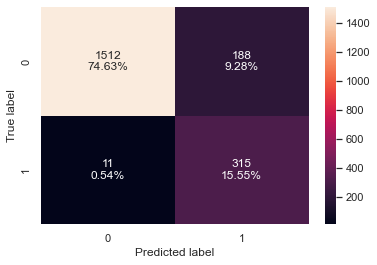

In [83]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

Training performance:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.970   0.899      0.913 0.906


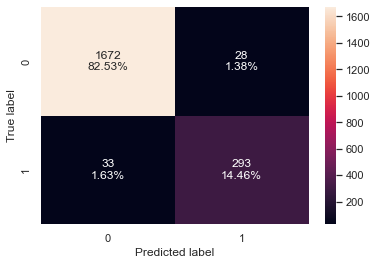

In [84]:
#Fitting the model
xgb_classifier_over = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
xgb_classifier_over_model_train_perf=model_performance_classification_sklearn(xgb_classifier_over,X_train_over,y_train_over)
print("Training performance:\n",xgb_classifier_over_model_train_perf)
xgb_classifier_over_model_test_perf=model_performance_classification_sklearn(xgb_classifier_over,X_val,y_val)
print("Testing performance:\n",xgb_classifier_over_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier_over,X_val,y_val)

Random Forest

In [85]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [86]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(100,501,50),
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': np.arange(1,10),
            'bootstrap': ['True', 'False'],
            'max_samples': np.arange(0.3, 0.7, 0.1), 
            'min_samples_split': np.arange(2,11,1),
            'class_weight': ['balanced', 'balanced_subsample'],
            'max_depth':np.arange(1,101,5),
            'min_impurity_decrease':[0, 0.001, 0.002, 0.003, 0.01, 0.1, 0.2, 0.4, 0.5]
            }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
rf_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
rf_tuned.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(rf_tuned.best_params_, rf_tuned.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.2, 'max_samples': 0.4, 'max_features': 'auto', 'max_depth': 11, 'class_weight': 'balanced_subsample', 'bootstrap': 'True'} with CV score=1.0:
Wall time: 46.6 s


In [87]:
# building model with best parameters
rf_tuned = RandomForestClassifier(
        n_estimators = 200,
        min_samples_split = 2,
        min_samples_leaf = 7,
        min_impurity_decrease = 0.001, 
        max_samples = 0.4,
        max_features = 'auto',
        max_depth = 11, 
        class_weight = 'balanced_subsample', 
        bootstrap = 'True'
    
)
# Fit the model on training data
rf_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(bootstrap='True', class_weight='balanced_subsample',
                       max_depth=11, max_samples=0.4,
                       min_impurity_decrease=0.001, min_samples_leaf=7,
                       n_estimators=200)

In [88]:
# Calculating different metrics on train set
rf_tuned_train = model_performance_classification_sklearn(
    rf_tuned, X_train_over, y_train_over
)
print("Training performance:")
rf_tuned_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.961,0.968,0.955,0.962


In [89]:
# Calculating different metrics on validation set
rf_tuned_val = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
print("Validation performance:")
rf_tuned_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.942,0.865,0.792,0.827


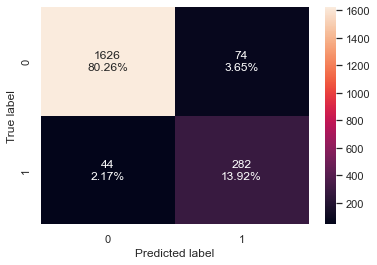

In [90]:
# creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

Gradient Boosting

In [91]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [92]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,151,50),
            'min_samples_leaf': np.arange(50,101,10),
            'max_depth':np.arange(5,10,1),
            'learning_rate': [0.5, 0.1, 0.2]
            }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbm_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gbm_tuned.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(gbm_tuned.best_params_, gbm_tuned.best_score_))

Best parameters are {'n_estimators': 50, 'min_samples_leaf': 50, 'max_depth': 5, 'learning_rate': 0.1} with CV score=0.9362729704246764:
Wall time: 2min 55s


In [93]:
# building model with best parameters
gbm_tuned = GradientBoostingClassifier(
        n_estimators = 50, 
        min_samples_leaf = 50, 
        max_depth = 5, 
        learning_rate = 0.37
    
)
# Fit the model on training data
gbm_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.37, max_depth=5, min_samples_leaf=50,
                           n_estimators=50)

In [94]:
# Calculating different metrics on train set
gbm_tuned_train = model_performance_classification_sklearn(
    gbm_tuned, X_train_over, y_train_over
)
print("Training performance:")
gbm_tuned_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999,0.999,0.999,0.999


In [95]:
# Calculating different metrics on validation set
gbm_tuned_val = model_performance_classification_sklearn(gbm_tuned, X_val, y_val)
print("Validation performance:")
gbm_tuned_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.971,0.908,0.914,0.911


Training performance:
    Accuracy  Recall  Precision    F1
0     0.981   0.982      0.980 0.981
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.961   0.874      0.880 0.877


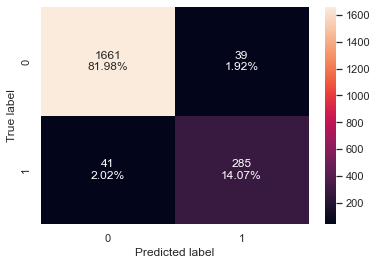

In [96]:
#Fitting the model
gb_classifier_over = GradientBoostingClassifier(random_state=1)
gb_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
gb_classifier_over_model_train_perf=model_performance_classification_sklearn(gb_classifier_over,X_train_over,y_train_over)
print("Training performance:\n",gb_classifier_over_model_train_perf)
gb_classifier_over_model_test_perf=model_performance_classification_sklearn(gb_classifier_over,X_val,y_val)
print("Testing performance:\n",gb_classifier_over_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier_over,X_val,y_val)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.974   0.882      0.951 0.915
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.969   0.862      0.940 0.899


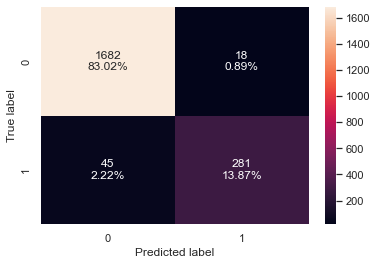

In [97]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_val,y_val)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_val,y_val)

#### Model Selection and Feature Importances

The model that performed best was our hypertuned gradient boosting model using oversampled data. 

The model gives us recall of 91% and very good accuracy of 97%

Below are the feature importances derived from that model

In [98]:
X.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Age_Group', 'Months_Group', 'Trans_Amt_Group', 'Trans_Ct_Group'],
      dtype='object')

In [99]:
gbm_tuned.feature_importances_

array([1.11840650e-02, 8.80103205e-05, 2.78203804e-03, 5.69869370e-02,
       3.82802973e-02, 2.82499233e-02, 7.43348739e-03, 8.04744434e-02,
       1.73797820e-03, 2.79095822e-02, 1.62271314e-01, 3.90785910e-01,
       4.98479748e-02, 1.06230390e-02, 8.48108329e-03, 1.24297260e-04,
       6.88978771e-04, 2.78572280e-04, 1.23321416e-04, 7.01328976e-04,
       9.08452658e-03, 3.29995328e-03, 9.69138557e-05, 8.01615127e-04,
       4.18355679e-04, 2.71607370e-04, 0.00000000e+00, 0.00000000e+00,
       1.38181267e-05, 8.06848639e-04, 3.70381380e-04, 1.13417781e-03,
       0.00000000e+00, 2.36471831e-04, 6.37013320e-05, 9.68535443e-04,
       0.00000000e+00, 3.49355197e-03, 0.00000000e+00, 1.88604222e-03,
       9.80009176e-02])

In [100]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        gbm_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
Total_Trans_Ct                 0.391
Total_Trans_Amt                0.162
Trans_Ct_Group_high            0.098
Total_Revolving_Bal            0.080
Total_Relationship_Count       0.057
Total_Ct_Chng_Q4_Q1            0.050
Months_Inactive_12_mon         0.038
Contacts_Count_12_mon          0.028
Total_Amt_Chng_Q4_Q1           0.028
Customer_Age                   0.011
Avg_Utilization_Ratio          0.011
Marital_Status_Married         0.009
Gender_M                       0.008
Credit_Limit                   0.007
Trans_Amt_Group_middle         0.003
Marital_Status_Single          0.003
Months_on_book                 0.003
Trans_Ct_Group_middle          0.002
Avg_Open_To_Buy                0.002
Age_Group_53-72                0.001
Months_Group_41-55             0.001
Age_Group_42-46                0.001
Income_Category_$60K - $80K    0.001
Education_Level_Uneducated     0.001
Education_Level_Graduate       0.001
Income_Category_$80K - $120K   0.000
A

#### Pipeline

In [101]:
data.select_dtypes(include=np.number).columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [102]:
data.select_dtypes(include='category').columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Age_Group', 'Months_Group',
       'Trans_Amt_Group', 'Trans_Ct_Group'],
      dtype='object')

In [103]:
# creating a list of numerical variables
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Age_Group', 'Months_Group',
       'Trans_Amt_Group', 'Trans_Ct_Group']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


In [104]:
X = data
y = data["Attrition_Flag"]

In [105]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

NameError: name 'Y' is not defined

In [ ]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "gbm_tuned",                
            GradientBoostingClassifier(
                n_estimators = 50, 
                min_samples_leaf = 50, 
                max_depth = 5, 
                learning_rate = 0.37

            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

In [ ]:
# transforming and predicting on test data
model.predict(X_test)

#### Business Insights and Recommendations

Reducing churn is critical to the long-term health of the bank. A study by Bain and Company suggested that increasing customer retention by just 5% can increase profits by 25% or more. Why is this so? Keeping a customer is most often times much less expensive than the cost associated with attracting each new customer. 

We observed the following: 
- Approximately 16% of customers had attrited during the observation period
- We learned that transaction count was the single biggest predictor of churn, followed closely by transaction amount, the total revolving balance, and the total relationship count
- EDA revealed that people in the following categories were proportionally more likely to attrite:
    - those with mid to high income
    - those with a graduate degree or above
    - those in higher card categories
    - those who have a greater number of dependents

Our recommendations include: 
- Determining if management wants to maintain all card categories - the higher categories experienced the most attrition and could be due to a lack of focus and expertise in these card types
    - Management should conduct a competitive audit to determine if the perks and benefits of the higher category cards are competitive and desirable by customers
- Management should realign efforts to reduce churn in the demographics listed above
    - Management may consider a promotion that would entice customers to stay - perhaps a cash back bonus for funds charged during a certain period :: managment could assess the customer acquisition cost and use that as a baseline for setting the incentive

Management should deploy the tuned GBM model to quickly and efficiently and effectively identify those most likely to churn. The model is simplistic, explainable, and gives management clear business rules to guide strategy. Management should test the model and periodically review results to determine if business rules need to be updated. 

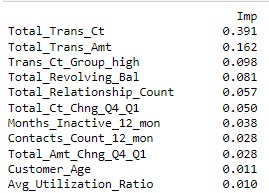


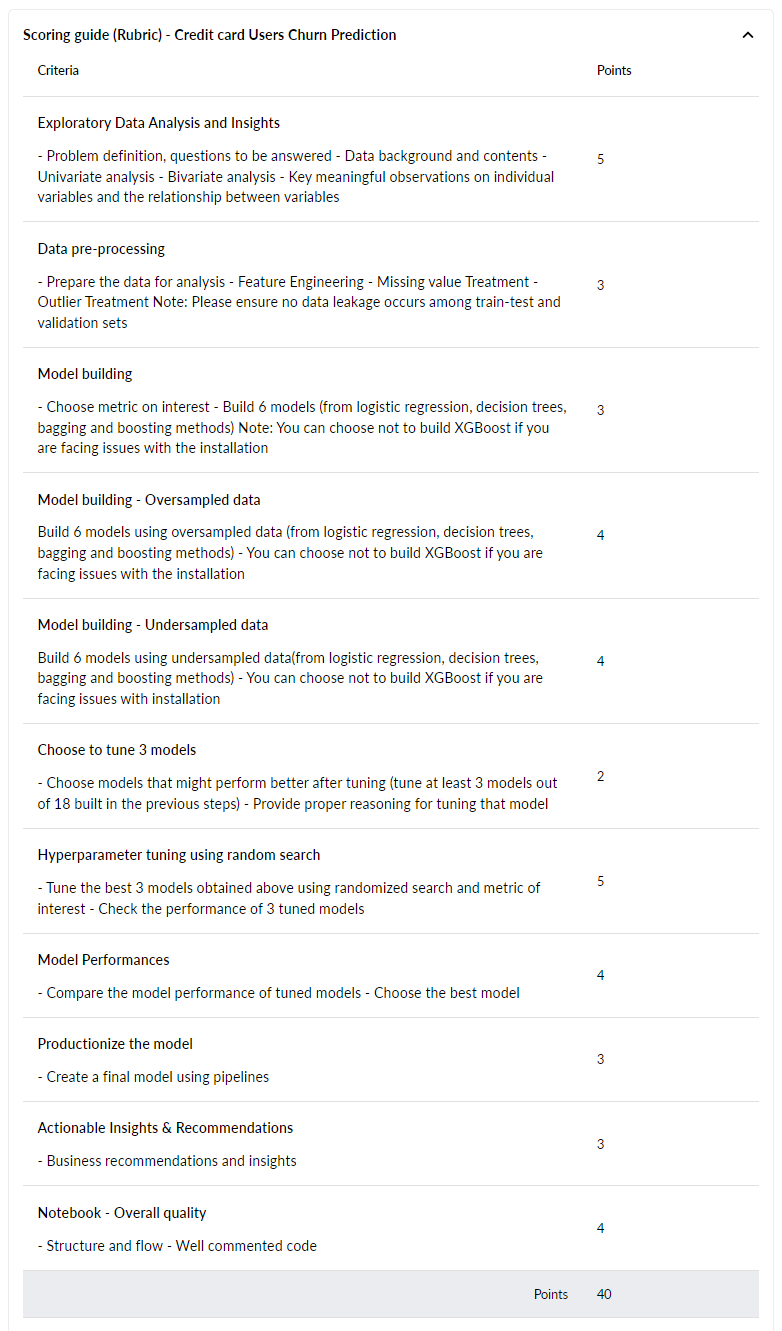